In [2]:
import pandas as pd

df = pd.read_csv('dyadic with ratio.csv')

df

,Year,Country A,Country B,War or not,gdp_ratio,gdp_per_capita_ratio,Military_expenditure_ratio,Democracy_differential,Share Border or not,Political Instability
0,1970,Afghanistan,Algeria,0,0.269549,0.331358,0.764880,2,0,0
1,1970,Afghanistan,Argentina,0,0.130739,0.247690,0.867838,2,0,0
2,1970,Afghanistan,Australia,0,0.085572,0.093302,0.549422,17,0,0
3,1970,Afghanistan,Austria,0,0.200369,0.126971,1.180763,17,0,0
4,1970,Afghanistan,Belgium,0,0.136827,0.112021,0.558344,17,0,0
...,...,...,...,...,...,...,...,...,...,...
447176,1986,Syria,China,0,0.013405,1.435651,7.372286,2,0,0
447177,1987,Vietnam,China,0,0.029115,0.504338,2.272280,0,0,0
447178,1987,Syria,China,0,0.012313,1.301773,6.447247,2,0,0
447179,1988,Vietnam,China,0,0.029055,0.500549,4.897662,0,0,0


In [3]:
df.info

<bound method DataFrame.info of         Year     Country A   Country B  War or not  gdp_ratio  \
0       1970  Afghanistan     Algeria            0   0.269549   
1       1970  Afghanistan   Argentina            0   0.130739   
2       1970  Afghanistan   Australia            0   0.085572   
3       1970  Afghanistan     Austria            0   0.200369   
4       1970  Afghanistan     Belgium            0   0.136827   
...      ...           ...         ...         ...        ...   
447176  1986         Syria      China            0   0.013405   
447177  1987       Vietnam      China            0   0.029115   
447178  1987         Syria      China            0   0.012313   
447179  1988       Vietnam      China            0   0.029055   
447180  1988         Syria      China            0   0.011993   

        gdp_per_capita_ratio  Military_expenditure_ratio  \
0                   0.331358                    0.764880   
1                   0.247690                    0.867838   
2      

In [4]:
df.dtypes

Year                            int64
Country A                      object
Country B                      object
War or not                      int64
gdp_ratio                     float64
gdp_per_capita_ratio          float64
Military_expenditure_ratio    float64
Democracy_differential          int64
Share Border or not             int64
Political Instability           int64
dtype: object

In [5]:
df.isna().sum()

Year                            0
Country A                       0
Country B                       0
War or not                      0
gdp_ratio                       0
gdp_per_capita_ratio            0
Military_expenditure_ratio    103
Democracy_differential          0
Share Border or not             0
Political Instability           0
dtype: int64

In [6]:
df = df.dropna()

In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Year,447078.0,1997.990937,12.928737,1970.000000,1988.000000,1999.000000,2009.000000,2018.000000
War or not,447078.0,0.000154,0.012422,0.000000,0.000000,0.000000,0.000000,1.000000
gdp_ratio,447078.0,15.469726,102.326949,0.000050,0.122347,0.747779,4.503127,7534.613878
gdp_per_capita_ratio,447078.0,3.029671,5.997417,0.004746,0.276218,0.897976,2.872614,154.846154
Military_expenditure_ratio,447078.0,47.731657,3157.922087,0.000000,0.479263,0.956668,1.939015,961947.803600
Democracy_differential,447078.0,7.404981,6.020114,0.000000,2.000000,6.000000,13.000000,20.000000
Share Border or not,447078.0,0.023054,0.150076,0.000000,0.000000,0.000000,0.000000,1.000000
Political Instability,447078.0,0.075063,0.272860,0.000000,0.000000,0.000000,0.000000,2.000000


### Exploratory Data Analysis Visulaisation

#### 1. Correlation Matrix

/var/folders/88/v5lhf14x1r5bv01kg4dwr5780000gn/T/ipykernel_17892/2208593585.py:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()


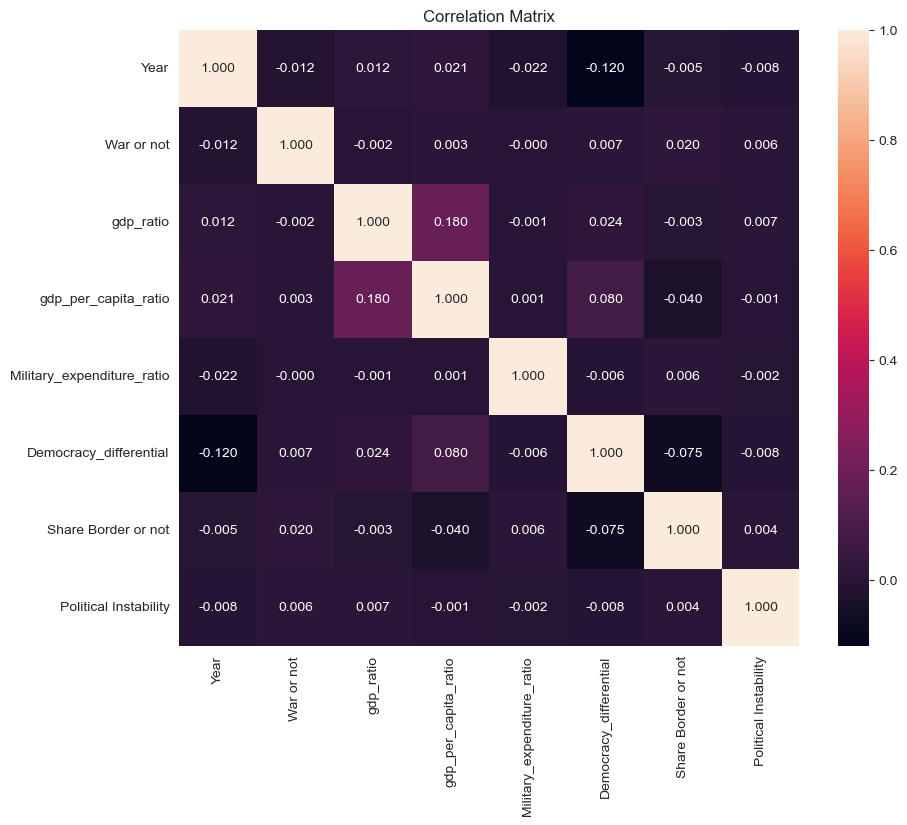

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

corr = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, annot=True, fmt=".3f")
plt.title("Correlation Matrix")
plt.show()

#### 2. Normalisation

In [9]:
from sklearn.preprocessing import MinMaxScaler

# Instantiate the MinMaxScaler
scaler = MinMaxScaler()

# Rescale the selected columns
df[['gdp_ratio', 'gdp_per_capita_ratio','Military_expenditure_ratio','Democracy_differential']] = scaler.fit_transform(df[['gdp_ratio', 'gdp_per_capita_ratio','Military_expenditure_ratio','Democracy_differential']])
df.head()

/var/folders/88/v5lhf14x1r5bv01kg4dwr5780000gn/T/ipykernel_17892/3062392132.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[['gdp_ratio', 'gdp_per_capita_ratio','Military_expenditure_ratio','Democracy_differential']] = scaler.fit_transform(df[['gdp_ratio', 'gdp_per_capita_ratio','Military_expenditure_ratio','Democracy_differential']])


,Year,Country A,Country B,War or not,gdp_ratio,gdp_per_capita_ratio,Military_expenditure_ratio,Democracy_differential,Share Border or not,Political Instability
0,1970,Afghanistan,Algeria,0,0.000036,0.002109,7.951363e-07,0.10,0,0
1,1970,Afghanistan,Argentina,0,0.000017,0.001569,9.021670e-07,0.10,0,0
2,1970,Afghanistan,Australia,0,0.000011,0.000572,5.711560e-07,0.85,0,0
3,1970,Afghanistan,Austria,0,0.000027,0.000789,1.227471e-06,0.85,0,0
4,1970,Afghanistan,Belgium,0,0.000018,0.000693,5.804310e-07,0.85,0,0


#### 3. Data Description after Normalization

In [10]:
df_description_normalized = df.describe().T
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Year,447078.0,1997.990937,12.928737,1970.0,1.988000e+03,1.999000e+03,2009.000000,2018.0
War or not,447078.0,0.000154,0.012422,0.0,0.000000e+00,0.000000e+00,0.000000,1.0
gdp_ratio,447078.0,0.002053,0.013581,0.0,1.623129e-05,9.923909e-05,0.000598,1.0
gdp_per_capita_ratio,447078.0,0.019536,0.038733,0.0,1.753224e-03,5.768677e-03,0.018521,1.0
Military_expenditure_ratio,447078.0,0.000050,0.003283,0.0,4.982213e-07,9.945118e-07,0.000002,1.0
Democracy_differential,447078.0,0.370249,0.301006,0.0,1.000000e-01,3.000000e-01,0.650000,1.0
Share Border or not,447078.0,0.023054,0.150076,0.0,0.000000e+00,0.000000e+00,0.000000,1.0
Political Instability,447078.0,0.075063,0.272860,0.0,0.000000e+00,0.000000e+00,0.000000,2.0


#### 4. Class Distribution

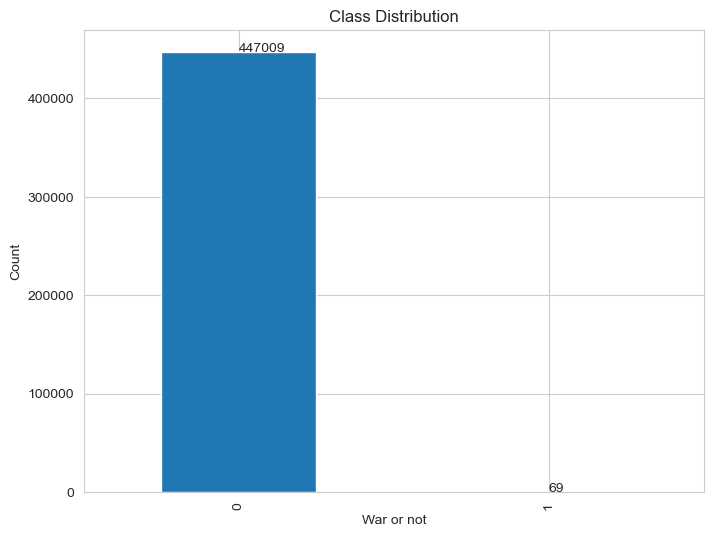

In [11]:
counts = df['War or not'].value_counts()
plt.figure(figsize=(8, 6))
counts.plot(kind='bar')
plt.xlabel('War or not')
plt.ylabel('Count')
plt.title('Class Distribution')
for index, value in enumerate(counts):
    plt.text(index, value, str(value))
plt.show()

#### 5. Histograms

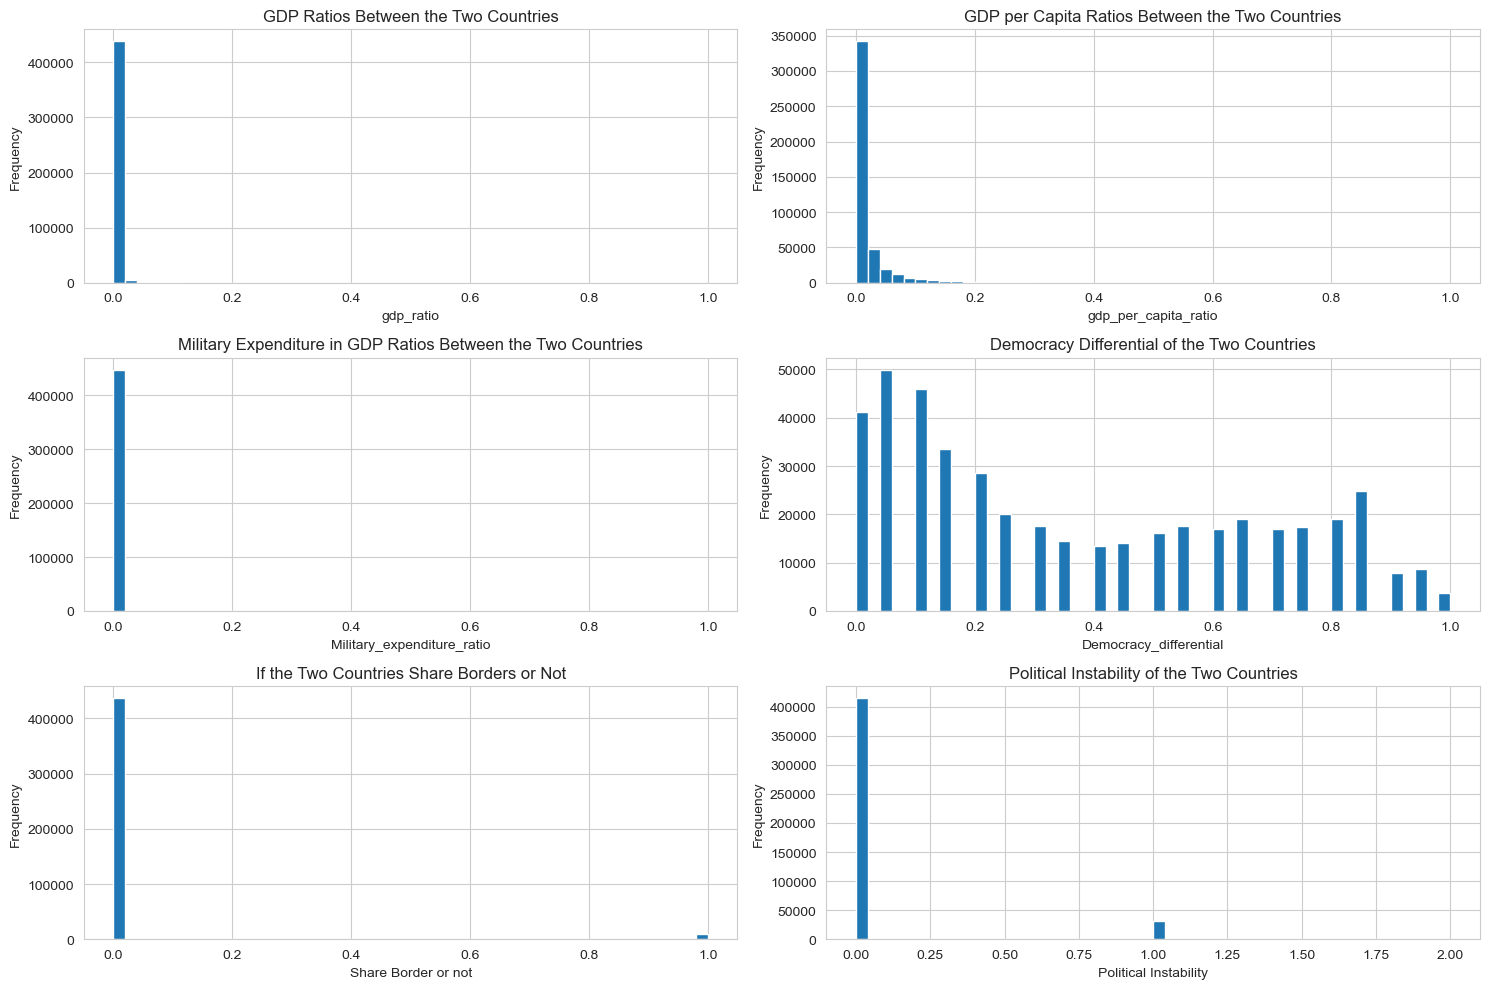

In [12]:
fig, ax = plt.subplots(3, 2, figsize=(15, 10))

# Columns and titles for histograms
columns = ['gdp_ratio', 'gdp_per_capita_ratio', 'Military_expenditure_ratio',
           'Democracy_differential', 'Share Border or not', 'Political Instability']
titles = ['GDP Ratios Between the Two Countries', 'GDP per Capita Ratios Between the Two Countries', 'Military Expenditure in GDP Ratios Between the Two Countries',
          'Democracy Differential of the Two Countries', 'If the Two Countries Share Borders or Not', 'Political Instability of the Two Countries']

# Plotting histograms
for i, (col, title) in enumerate(zip(columns, titles)):
    df[col].hist(ax=ax[i//2, i%2], bins=50)
    ax[i//2, i%2].set_title(title)
    ax[i//2, i%2].set_xlabel(col)
    ax[i//2, i%2].set_ylabel('Frequency')

plt.tight_layout()
plt.show()


#### Boxplot

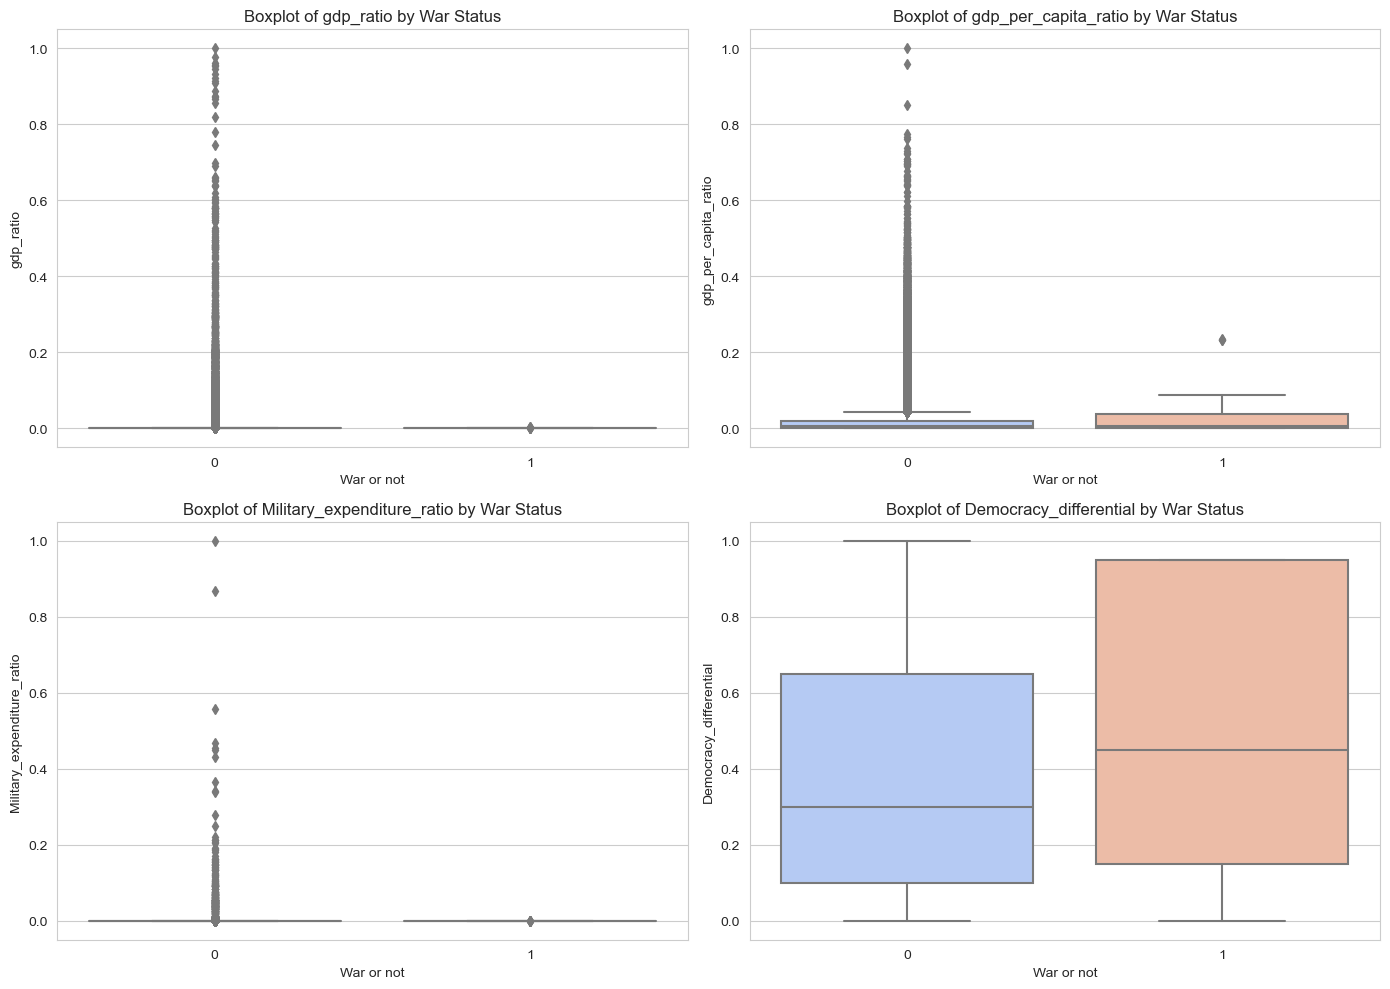

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

# List of the numerical variables
variables = ['gdp_ratio', 'gdp_per_capita_ratio', 'Military_expenditure_ratio', 'Democracy_differential']

# Set up the matplotlib figure
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(14, 10))

# Flatten the axes to make indexing easier
axes = axes.flatten()

for i, var in enumerate(variables):
    sns.boxplot(x='War or not', y=var, data=df, ax=axes[i], palette='coolwarm')
    axes[i].set_title(f'Boxplot of {var} by War Status')
    axes[i].set_ylabel(var)  # setting y-label for clarity
    axes[i].set_xlabel('War or not')  # setting x-label for clarity

plt.tight_layout()
plt.show()


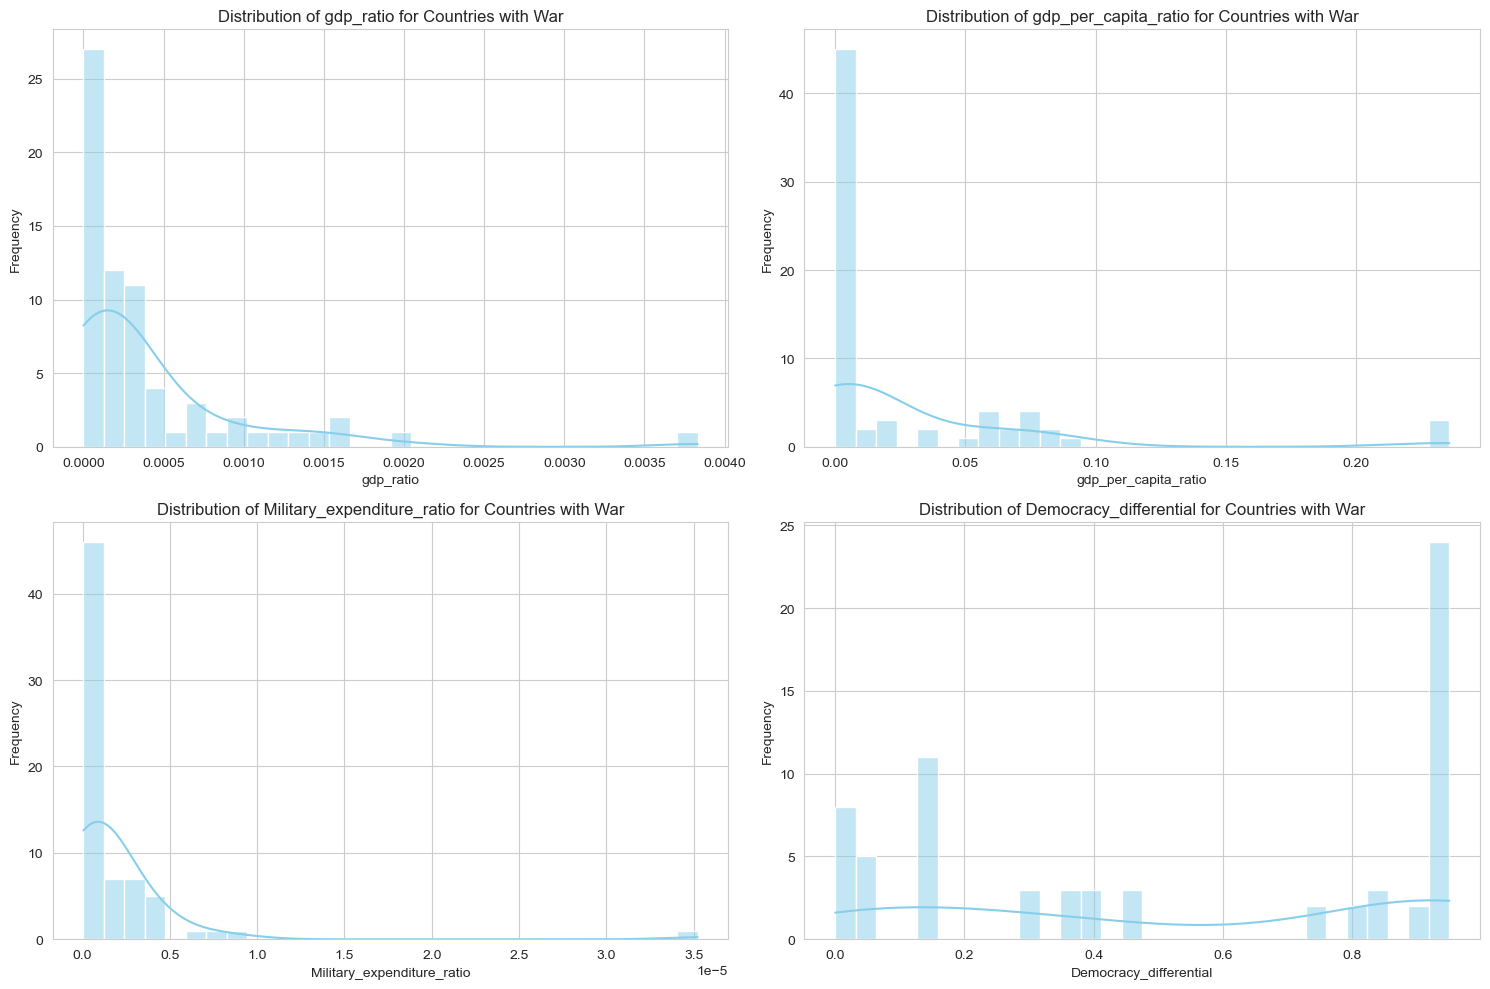

In [14]:
# 定义需要进行可视化的变量
variables_to_nominalize = ['gdp_ratio', 'gdp_per_capita_ratio', 'Military_expenditure_ratio', 'Democracy_differential']
war_data = df[df['War or not'] == 1]
# 对发生战争的国家对进行可视化
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 10))

for var, ax in zip(variables_to_nominalize, axes.ravel()):
    sns.histplot(war_data[var], ax=ax, kde=True, color='skyblue', bins=30)
    ax.set_title(f"Distribution of {var} for Countries with War")
    ax.set_xlabel(f"{var}")
    ax.set_ylabel("Frequency")

plt.tight_layout()
plt.show()


#### Mosaic

<Figure size 3000x2000 with 0 Axes>

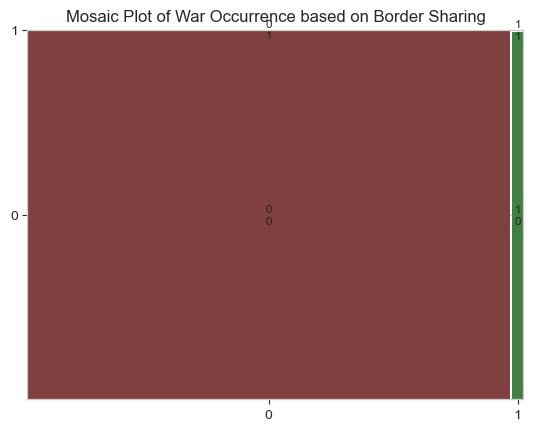

In [15]:
from statsmodels.graphics.mosaicplot import mosaic

# 绘制马赛克图展示Share Border or not与War or not之间的关系
plt.figure(figsize=(30, 20))
mosaic(df, ['Share Border or not', 'War or not'], title="Mosaic Plot of War Occurrence based on Border Sharing")
plt.show()


<Figure size 1200x800 with 0 Axes>

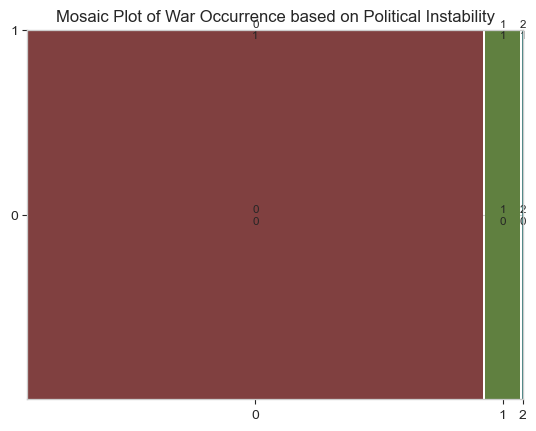

In [16]:
# 使用正确的列名重新绘制马赛克图展示Political Instability与War or not之间的关系
plt.figure(figsize=(12, 8))
mosaic(df, ['Political Instability', 'War or not'], title="Mosaic Plot of War Occurrence based on Political Instability")
plt.show()


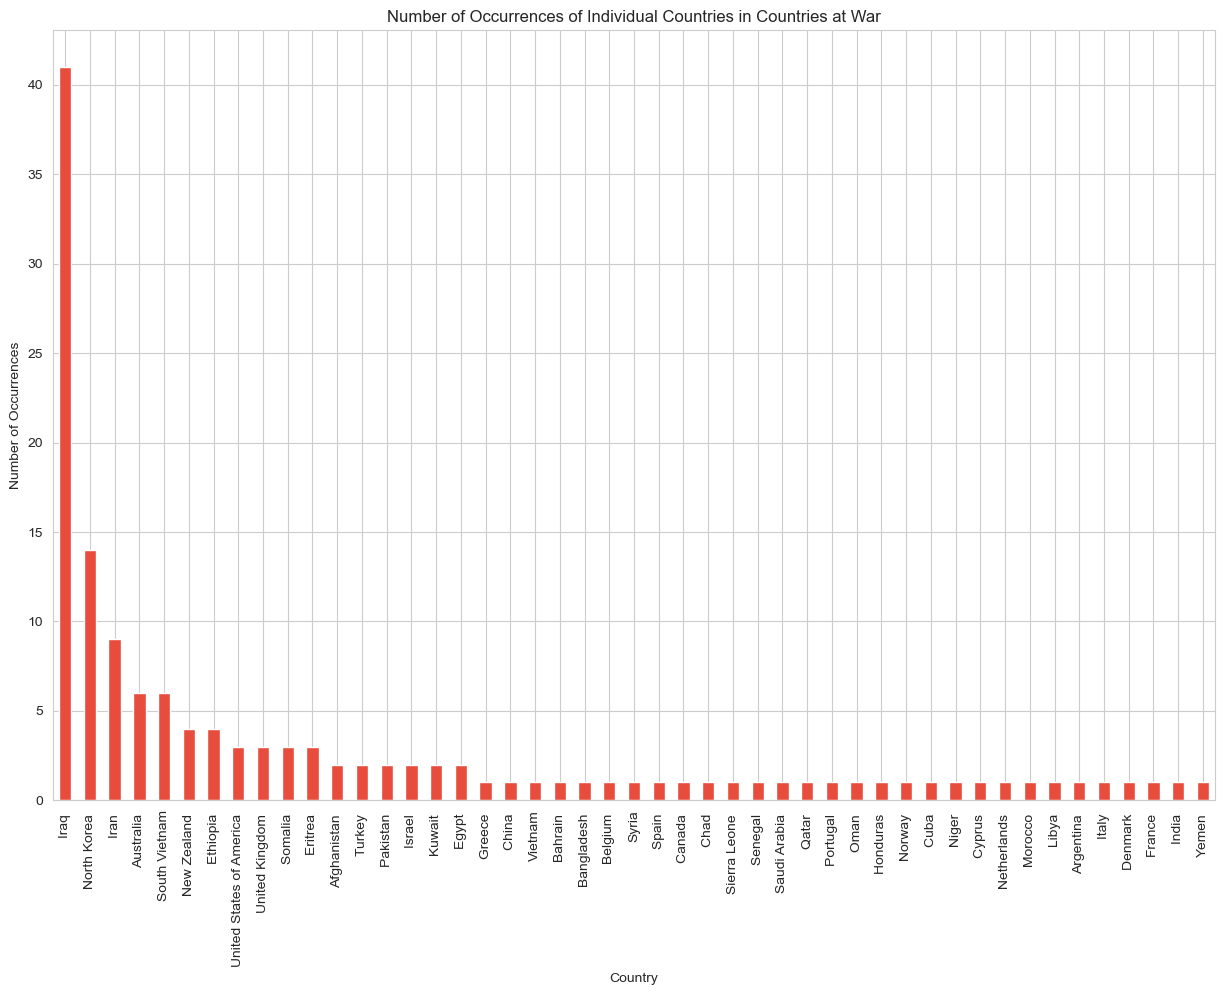

In [17]:
war_countries = df[df['War or not'] == 1]

# 计算Country A和Country B中发生战争的次数
war_count_A = war_countries['Country A'].value_counts()
war_count_B = war_countries['Country B'].value_counts()

# 将两个系列合并并求和，以获取每个国家的总战争次数
total_war_count = war_count_A.add(war_count_B, fill_value=0).sort_values(ascending=False)

# 绘制条形图
plt.figure(figsize=(15, 10))
total_war_count.plot(kind='bar', color='#e74c3c')
plt.title("Number of Occurrences of Individual Countries in Countries at War")
plt.ylabel("Number of Occurrences")
plt.xlabel("Country")
plt.show()

### Model Building
#### 0. Always Predicting No War

Accuracy: 0.9998434284691777
Precision: 0.9996868814529998
Recall: 0.9998434284691777
F1 score: 0.9997651488329076
AUC: 0.5
Confusion matrix:
 [[89402     0]
 [   14     0]]


/Users/zakotianskyi/anaconda3/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


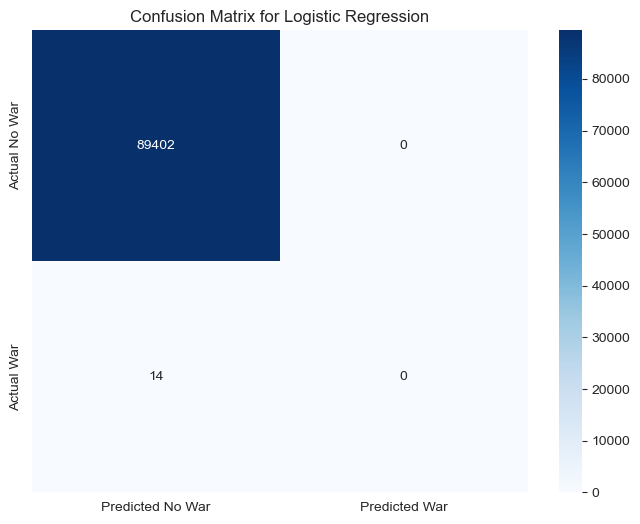

In [18]:
# create model to always predict no war
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix
from sklearn.model_selection import train_test_split


X = df[['gdp_ratio','gdp_per_capita_ratio','Military_expenditure_ratio','Democracy_differential','Share Border or not','Political Instability']]
y = df['War or not']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# always predict no war
y_pred = [0] * len(y_test)

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
roc_auc = roc_auc_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)

# Print the evaluation metrics
print('Accuracy:', accuracy)
print('Precision:', precision)
print('Recall:', recall)
print('F1 score:', f1)
print('AUC:', roc_auc)
print('Confusion matrix:\n', cm)

# Confusion Matrix Visualization for Logistic Regression model

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues',
            xticklabels=['Predicted No War', 'Predicted War'],
            yticklabels=['Actual No War', 'Actual War'])
plt.title('Confusion Matrix for Logistic Regression')
plt.show()



#### 1. Logistic Regression

Accuracy: 0.7581976380066208
Balanced Accuracy: 0.7719538073612926
Precision: 0.9997992587537167
Recall: 0.7581976380066208
F1 score: 0.8623173309073419
AUC: 0.8261328445832148
Confusion matrix:
 [[67784 21618]
 [    3    11]]


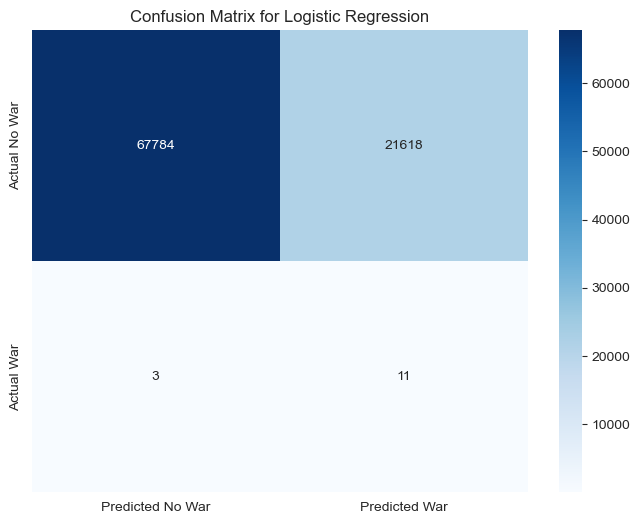

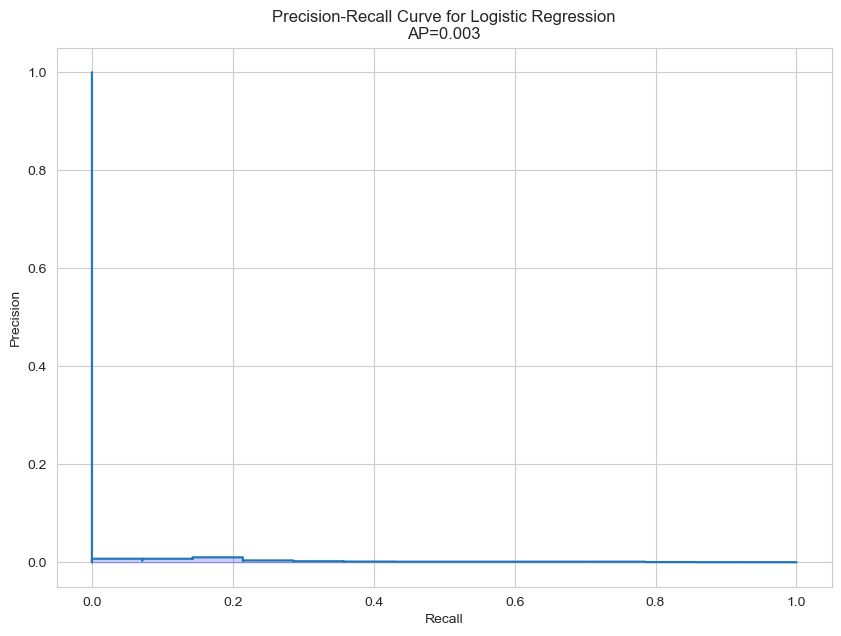

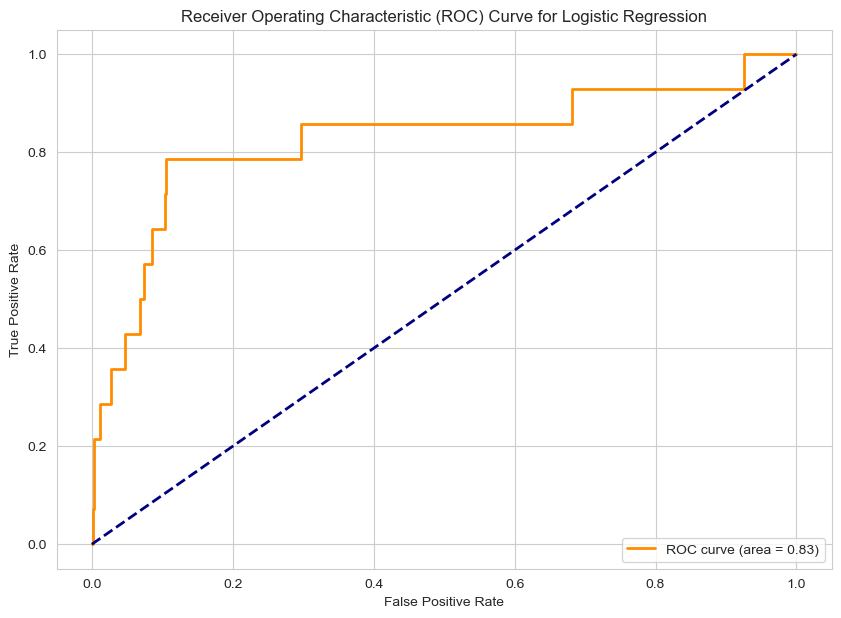

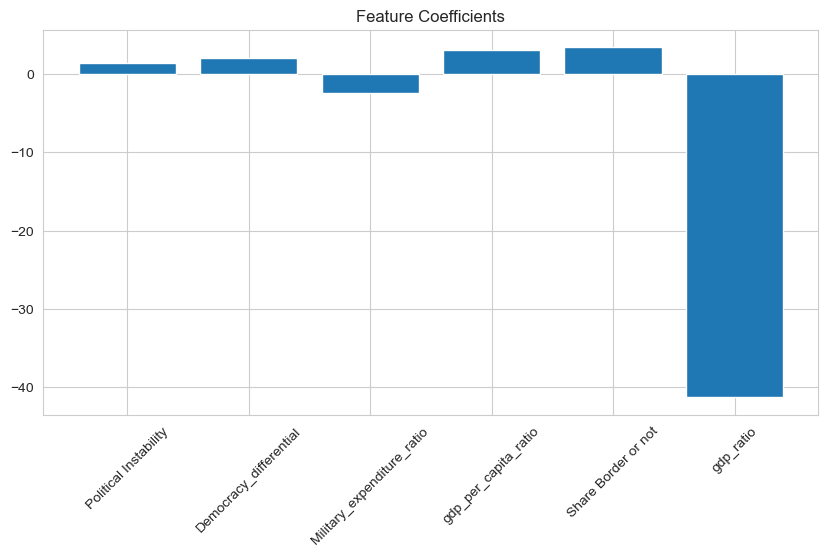

In [19]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, \
    balanced_accuracy_score
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import cross_val_score
from sklearn.metrics import precision_recall_curve, average_precision_score
from sklearn.metrics import roc_curve, auc


X = df[['gdp_ratio','gdp_per_capita_ratio','Military_expenditure_ratio','Democracy_differential','Share Border or not','Political Instability']]
y = df['War or not']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Initialize the model
lg_model = LogisticRegression(random_state=42, max_iter=1000, class_weight='balanced')

# Fit the best model to the data
lg_model.fit(X_train, y_train)

# Make predictions
y_pred = lg_model.predict(X_test)

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
balanced_accuracy = balanced_accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
auc_score = roc_auc_score(y_test, lg_model.predict_proba(X_test)[:, 1])
cm = confusion_matrix(y_test, y_pred)

# Print the evaluation metrics
print('Accuracy:', accuracy)
print('Balanced Accuracy:', balanced_accuracy)
print('Precision:', precision)
print('Recall:', recall)
print('F1 score:', f1)
print('AUC:', auc_score)
print('Confusion matrix:\n', cm)


# Confusion Matrix Visualization for Logistic Regression model

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues',
            xticklabels=['Predicted No War', 'Predicted War'],
            yticklabels=['Actual No War', 'Actual War'])
plt.title('Confusion Matrix for Logistic Regression')
plt.show()

# Precision-Recall Curve for Logistic Regression model

logreg_precision, logreg_recall, _ = precision_recall_curve(y_test, lg_model.predict_proba(X_test)[:, 1])
logreg_average_precision = average_precision_score(y_test, lg_model.predict_proba(X_test)[:, 1])

plt.figure(figsize=(10, 7))
plt.step(logreg_recall, logreg_precision, where='post')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve for Logistic Regression\nAP={0:0.3f}'.format(logreg_average_precision))
plt.fill_between(logreg_recall, logreg_precision, step='post', alpha=0.2, color='b')
plt.show()

# ROC Curve for Logistic Regression model

logreg_fpr, logreg_tpr, _ = roc_curve(y_test, lg_model.predict_proba(X_test)[:, 1])
logreg_roc_auc = auc(logreg_fpr, logreg_tpr)

plt.figure(figsize=(10, 7))
plt.plot(logreg_fpr, logreg_tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % logreg_roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for Logistic Regression')
plt.legend(loc="lower right")
plt.show()

# Visualization of Feature Coefficients

coef = lg_model.coef_[0]
sorted_indices = np.argsort(np.abs(coef))
plt.figure(figsize=(10, 5))
plt.bar(X.columns[sorted_indices], coef[sorted_indices])
plt.xticks(rotation=45)
plt.title('Feature Coefficients')
plt.show()

In [20]:
import pandas as pd

# 从模型中获取系数
coef = lg_model.coef_[0]

# 创建一个DataFrame来存储特征名称和对应的系数值
df_coef = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': coef
})

# 按系数的绝对值进行排序
df_sorted = df_coef.reindex(df_coef.Coefficient.abs().sort_values(ascending=False).index)

# 打印表格
print(df_sorted)

                      Feature  Coefficient
0                   gdp_ratio   -41.320582
4         Share Border or not     3.442522
1        gdp_per_capita_ratio     3.141782
2  Military_expenditure_ratio    -2.448276
3      Democracy_differential     2.019308
5       Political Instability     1.420837


#### 2. Decision Tree

Accuracy: 0.9998546121499507
Balanced Accuracy: 0.642840364709003
Precision: 0.9998210698635472
Recall: 0.9998546121499507
F1 score: 0.9998303836873932
AUC: 0.642840364709003
Confusion matrix:
 [[89399     3]
 [   10     4]]


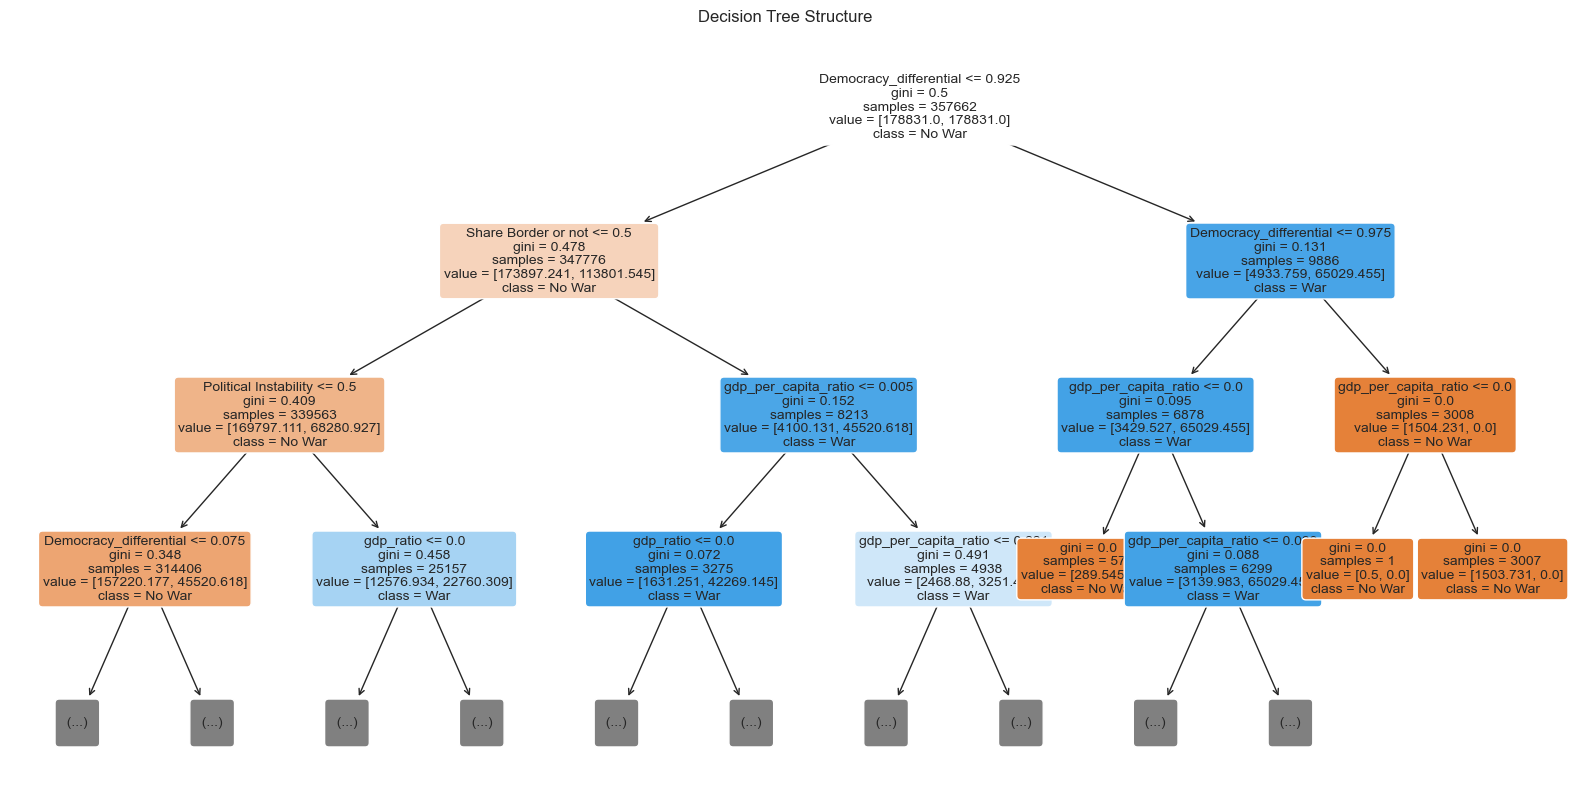

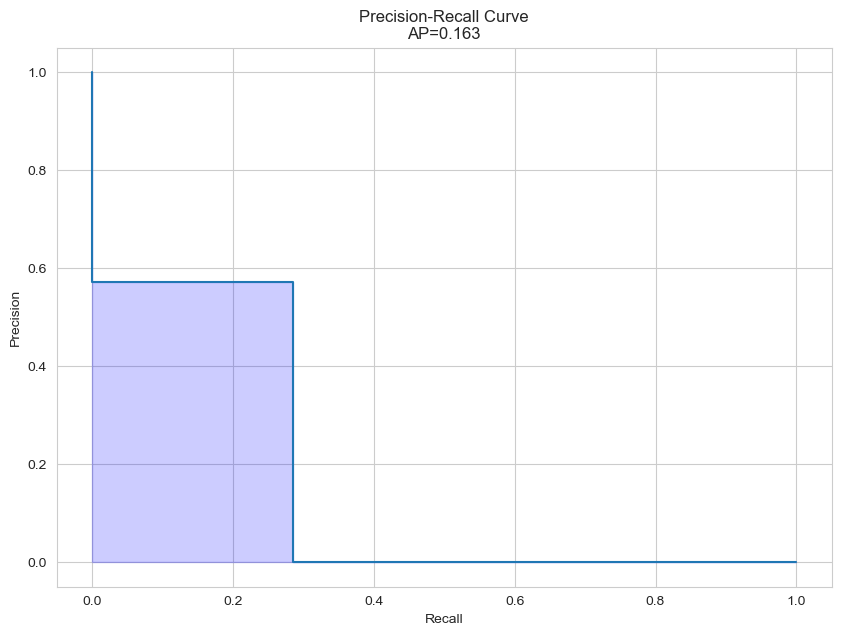

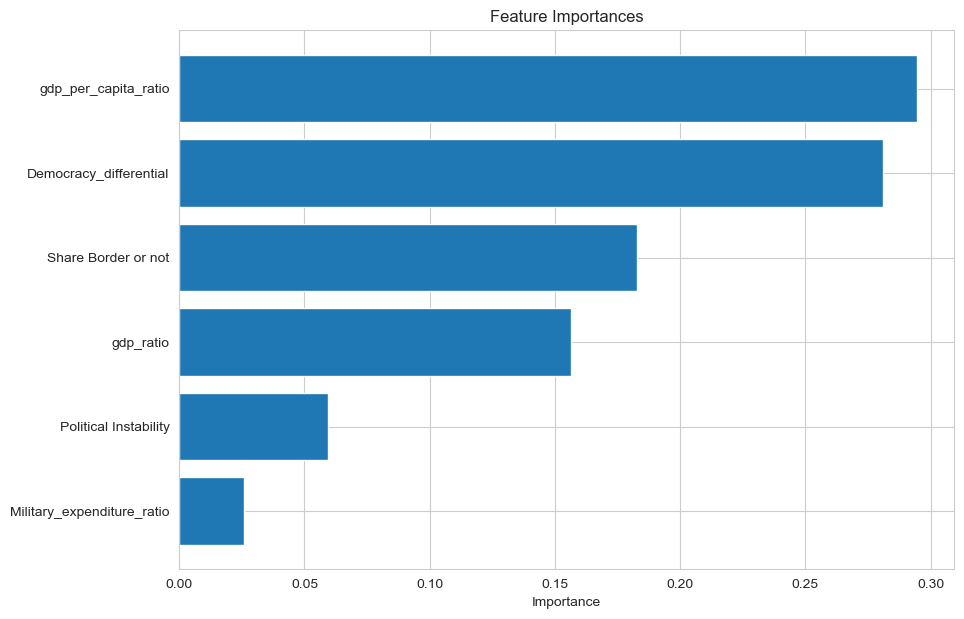

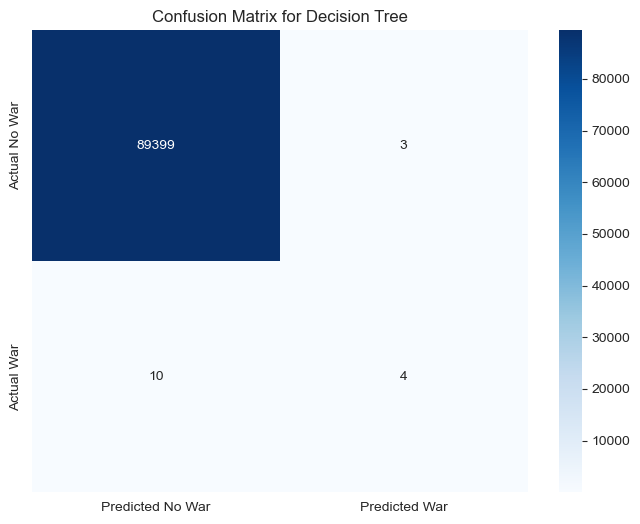

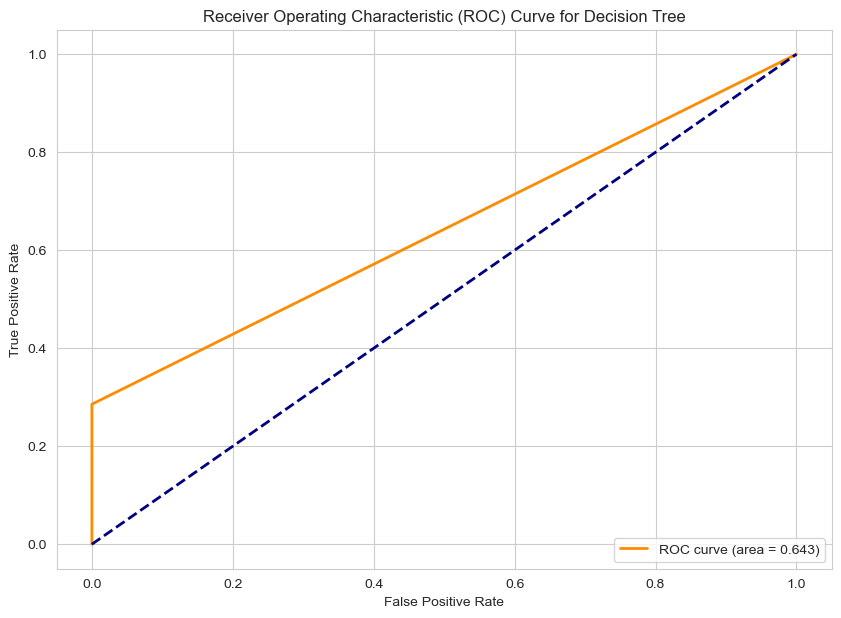

In [21]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.tree import plot_tree
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve
from sklearn.metrics import average_precision_score
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import auc

X = df[['gdp_ratio','gdp_per_capita_ratio','Military_expenditure_ratio','Democracy_differential','Share Border or not','Political Instability']]
y = df['War or not']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Define the hyperparameters to search over
param_grid = {
    'max_depth': [None, 5, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize the model
dt_model = DecisionTreeClassifier(criterion='gini',random_state=42,class_weight='balanced')

# Perform a grid search over the hyperparameters
grid_search = GridSearchCV(dt_model, param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# Fit the grid search object to the data (this will take some time)
grid_search.fit(X_train, y_train)

# Get the best model
best_dt_model = grid_search.best_estimator_

# Fit the best model to the data
best_dt_model.fit(X_train, y_train)

# Make predictions
y_pred = best_dt_model.predict(X_test)

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
balanced_accuracy = balanced_accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
roc_auc_value = roc_auc_score(y_test, best_dt_model.predict_proba(X_test)[:, 1])
cm = confusion_matrix(y_test, y_pred)

# Print the evaluation metrics
print('Accuracy:', accuracy)
print('Balanced Accuracy:', balanced_accuracy)
print('Precision:', precision)
print('Recall:', recall)
print('F1 score:', f1)
print('AUC:', roc_auc_value)
print('Confusion matrix:\n', cm)

# Visualizing the structure of the Decision Tree
plt.figure(figsize=(20, 10))
plot_tree(best_dt_model, feature_names=X.columns, class_names=['No War', 'War'], filled=True, rounded=True, fontsize=10, max_depth=3)
plt.title("Decision Tree Structure")
plt.show()

# Precision-Recall Curve

precision, recall, thresholds = precision_recall_curve(y_test, best_dt_model.predict_proba(X_test)[:, 1])
average_precision = average_precision_score(y_test, best_dt_model.predict_proba(X_test)[:, 1])

plt.figure(figsize=(10, 7))
plt.step(recall, precision, where='post')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve\nAP={0:0.3f}'.format(average_precision))
plt.fill_between(recall, precision, step='post', alpha=0.2, color='b')
plt.show()

# Feature Importance Plot

feature_importances = best_dt_model.feature_importances_
sorted_idx = feature_importances.argsort()

plt.figure(figsize=(10, 7))
plt.barh(X.columns[sorted_idx], feature_importances[sorted_idx])
plt.xlabel('Importance')
plt.title('Feature Importances')
plt.show()

# Confusion Matrix Visualization

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues',
            xticklabels=['Predicted No War', 'Predicted War'],
            yticklabels=['Actual No War', 'Actual War'])
plt.title('Confusion Matrix for Decision Tree')
plt.show()

# ROC Curve for Decision Tree model

dt_fpr, dt_tpr, _ = roc_curve(y_test, best_dt_model.predict_proba(X_test)[:, 1])
dt_roc_auc_score = auc(dt_fpr, dt_tpr)

plt.figure(figsize=(10, 7))
plt.plot(dt_fpr, dt_tpr, color='darkorange', lw=2, label='ROC curve (area = %0.3f)' % dt_roc_auc_score)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for Decision Tree')
plt.legend(loc="lower right")
plt.show()


In [22]:
# 创建一个DataFrame来存储特征名称和对应的重要性
df_feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': feature_importances
})

# 按特征重要性值排序
df_sorted = df_feature_importance.sort_values(by='Importance', ascending=False)

# 打印表格
print(df_sorted)


                      Feature  Importance
1        gdp_per_capita_ratio    0.294674
3      Democracy_differential    0.281049
4         Share Border or not    0.182599
0                   gdp_ratio    0.156221
5       Political Instability    0.059530
2  Military_expenditure_ratio    0.025928


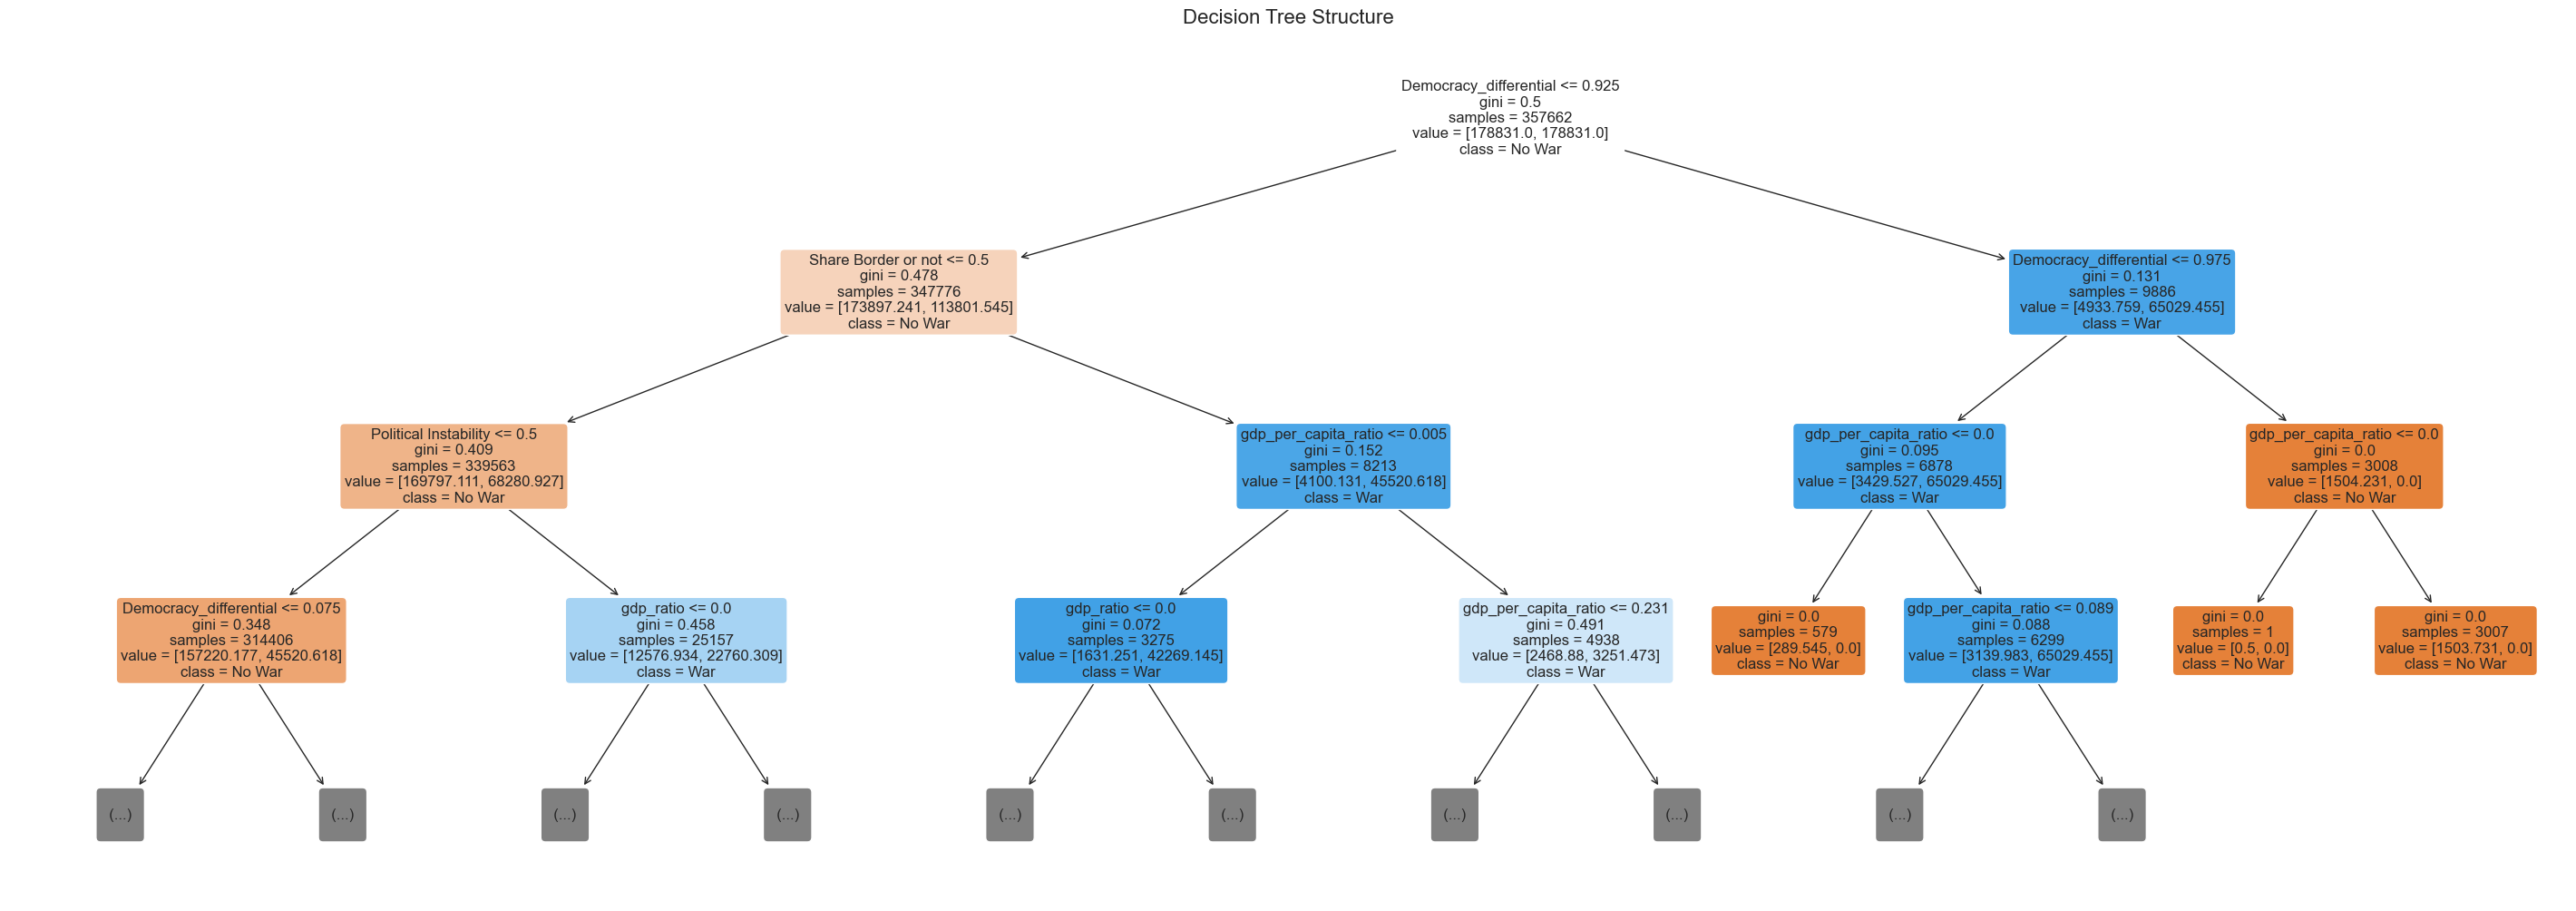

In [23]:
# Visualizing the structure of the Decision Tree
fig, ax = plt.subplots(figsize=(24, 12))  # adjust the size of the figure
plot_tree(best_dt_model, feature_names=X.columns, class_names=['No War', 'War'], filled=True, rounded=True, fontsize=12, ax=ax, max_depth=3)
plt.title("Decision Tree Structure", fontsize=16)
plt.subplots_adjust(bottom=0.1, right=1.3, top=0.9)  # adjust the space to avoid overlapping
plt.show()


#### 4. Bagging on Decision Tree

In [24]:
! pip install graphviz


ERROR: Could not find an activated virtualenv (required).


/Users/zakotianskyi/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


Accuracy: 0.9998546121499507
Precision: 0.9998136218308661
Recall: 0.9998546121499507
F1 score: 0.9998075793761929
AUC: 0.7135718440303349
Confusion matrix:
 [[89401     1]
 [   12     2]]


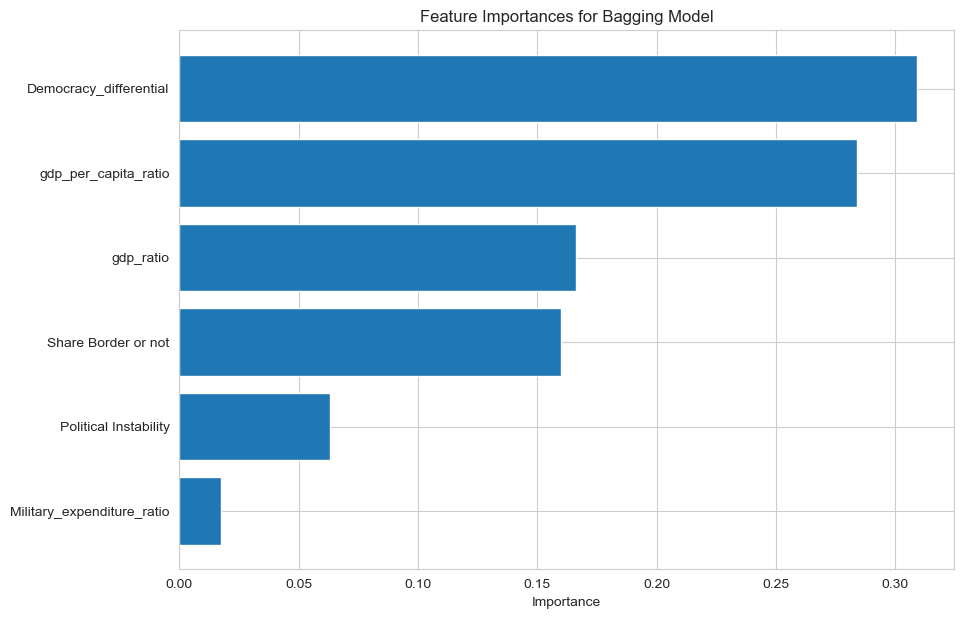

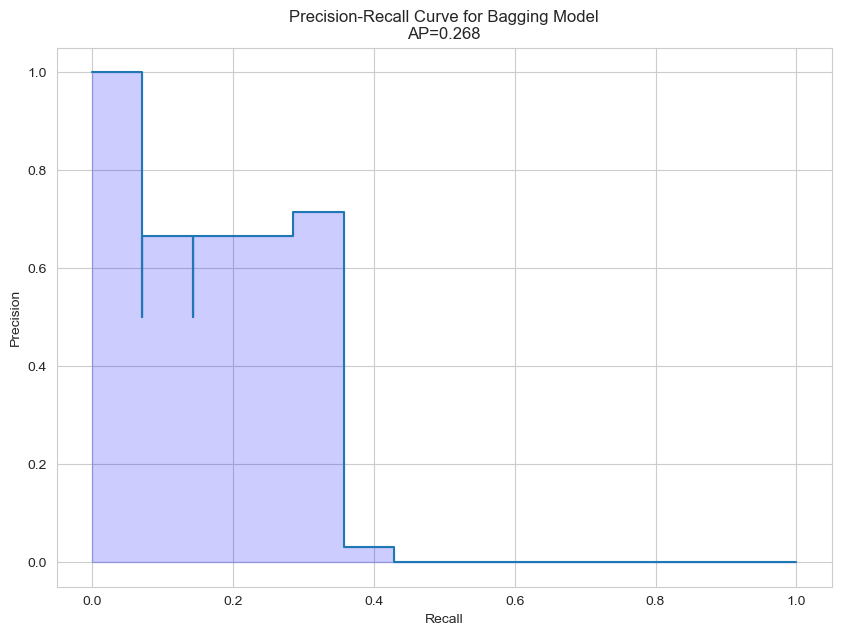

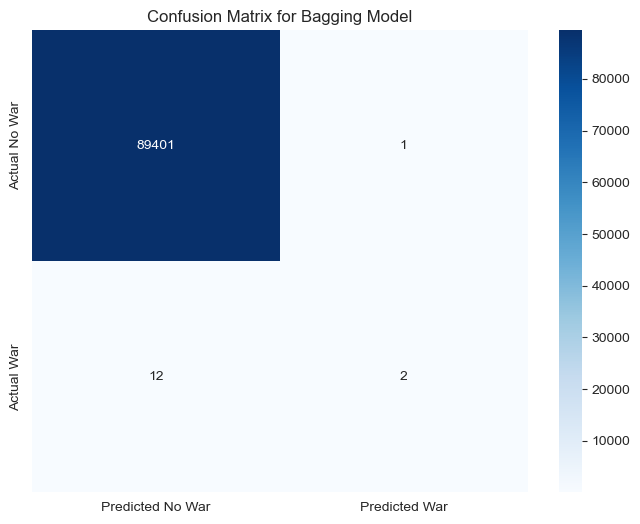

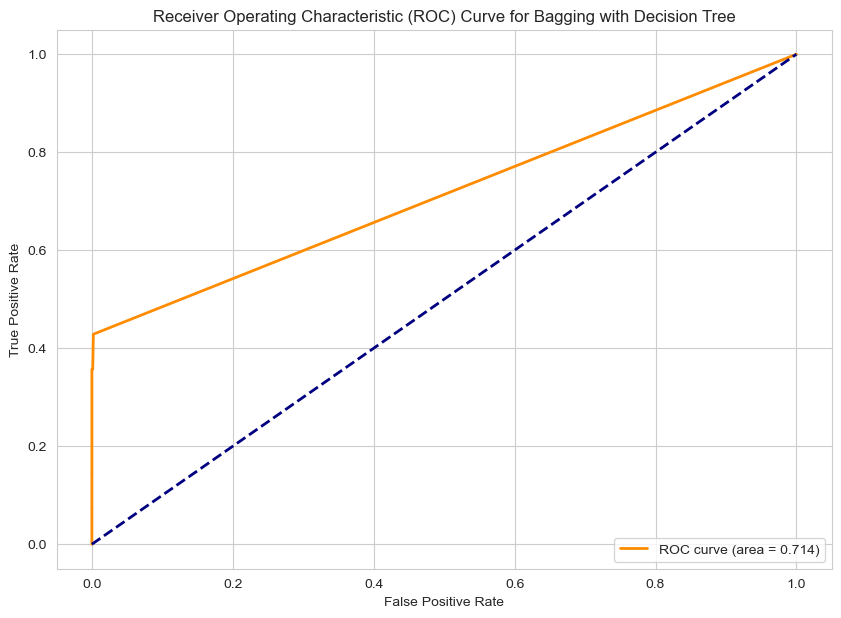

/Users/zakotianskyi/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/Users/zakotianskyi/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/Users/zakotianskyi/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/Users/zakotianskyi/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/Users/zakotianskyi/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 

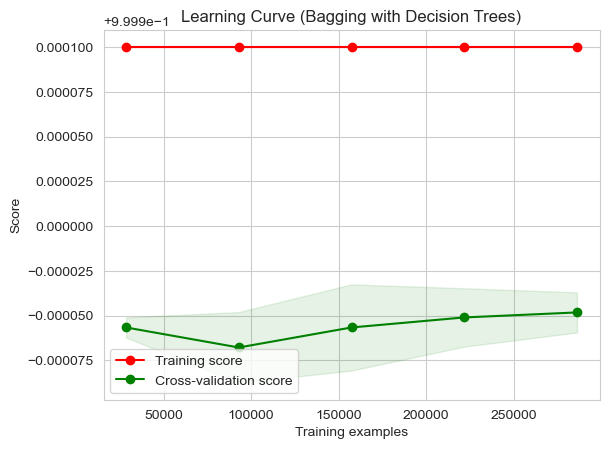

ModuleNotFoundError: No module named 'graphviz'

In [25]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score, roc_auc_score, roc_curve
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import precision_recall_curve, average_precision_score, auc

X = df[['gdp_ratio','gdp_per_capita_ratio','Military_expenditure_ratio','Democracy_differential','Share Border or not','Political Instability']]
y = df['War or not']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Define the base model
base_model = DecisionTreeClassifier(random_state=42, class_weight='balanced')

# Initialize the BaggingClassifier
bagging_model = BaggingClassifier(base_estimator=base_model, n_estimators=100, random_state=42)

# Fit the model
bagging_model.fit(X_train, y_train)

# Make predictions
y_pred = bagging_model.predict(X_test)

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
roc_auc_value = roc_auc_score(y_test, bagging_model.predict_proba(X_test)[:, 1])
cm = confusion_matrix(y_test, y_pred)

# Print the evaluation metrics
print('Accuracy:', accuracy)
print('Precision:', precision)
print('Recall:', recall)
print('F1 score:', f1)
print('AUC:', roc_auc_value)
print('Confusion matrix:\n', cm)

# Feature Importance Plot

# Calculate feature importances
feature_importances = np.mean([
    tree.feature_importances_ for tree in bagging_model.estimators_
], axis=0)
sorted_idx = feature_importances.argsort()

plt.figure(figsize=(10, 7))
plt.barh(X.columns[sorted_idx], feature_importances[sorted_idx])
plt.xlabel('Importance')
plt.title('Feature Importances for Bagging Model')
plt.show()

# Precision-Recall Curve for Bagging with Decision Tree model

bagging_precision, bagging_recall, _ = precision_recall_curve(y_test, bagging_model.predict_proba(X_test)[:, 1])
bagging_average_precision = average_precision_score(y_test, bagging_model.predict_proba(X_test)[:, 1])

plt.figure(figsize=(10, 7))
plt.step(bagging_recall, bagging_precision, where='post')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve for Bagging Model\nAP={0:0.3f}'.format(bagging_average_precision))
plt.fill_between(bagging_recall, bagging_precision, step='post', alpha=0.2, color='b')
plt.show()

# Confusion Matrix Visualization for Bagging with Decision Tree model

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues',
            xticklabels=['Predicted No War', 'Predicted War'],
            yticklabels=['Actual No War', 'Actual War'])
plt.title('Confusion Matrix for Bagging Model')
plt.show()

# ROC Curve for bagging model

bagging_fpr, bagging_tpr, _ = roc_curve(y_test, bagging_model.predict_proba(X_test)[:, 1])
bagging_roc_auc_score = auc(bagging_fpr, bagging_tpr)

plt.figure(figsize=(10, 7))
plt.plot(bagging_fpr, bagging_tpr, color='darkorange', lw=2, label='ROC curve (area = %0.3f)' % bagging_roc_auc_score)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for Bagging with Decision Tree')
plt.legend(loc="lower right")
plt.show()

from sklearn.model_selection import learning_curve

def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None, n_jobs=-1, train_sizes=np.linspace(.1, 1.0, 5)):
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1, color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")
    plt.legend(loc="best")
    return plt

plot_learning_curve(bagging_model, "Learning Curve (Bagging with Decision Trees)", X_train, y_train, cv=5)
plt.show()

from sklearn.tree import export_graphviz
import graphviz

# Extract a single tree from the bagged ensemble
tree = bagging_model.estimators_[0]

dot_data = export_graphviz(tree, out_file=None, 
                           feature_names=X.columns,  
                           class_names=['No War', 'War'],  
                           filled=True, rounded=True,  
                           special_characters=True)  
graph = graphviz.Source(dot_data)  
graph


#### 3. Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV, train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import plot_tree
from sklearn.metrics import precision_recall_curve, average_precision_score, auc


X = df[['gdp_ratio','gdp_per_capita_ratio','Military_expenditure_ratio','Democracy_differential','Share Border or not','Political Instability']]
y = df['War or not']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Define the model
rf_model = RandomForestClassifier(criterion = 'gini', random_state=42, class_weight='balanced')

# Define the hyperparameters to search over
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 5, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Perform a grid search over the hyperparameters
grid_search = GridSearchCV(rf_model, param_grid, scoring='recall', cv=5, n_jobs=-1)
grid_search.fit(X_train, y_train)

# Fit the model using the best hyperparameters found by the grid search
best_rf_model = grid_search.best_estimator_
best_rf_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = best_rf_model.predict(X_test)

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
rf_roc_auc = roc_auc_score(y_test, best_rf_model.predict_proba(X_test)[:, 1])
cm = confusion_matrix(y_test, y_pred)

# Print the evaluation metrics
print('Accuracy:', accuracy)
print('Precision:', precision)
print('Recall:', recall)
print('F1 score:', f1)
print('AUC:', rf_roc_auc)
print('Confusion matrix:\n', cm)

# Feature Importance Plot

feature_importances = best_rf_model.feature_importances_
sorted_idx = feature_importances.argsort()

plt.figure(figsize=(10, 7))
plt.barh(X.columns[sorted_idx], feature_importances[sorted_idx])
plt.xlabel('Importance')
plt.title('Feature Importances for Random Forest Classifier')
plt.show()

# Confusion Matrix Visualization

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues',
            xticklabels=['Predicted No War', 'Predicted War'],
            yticklabels=['Actual No War', 'Actual War'])
plt.title('Confusion Matrix for Random Forest')
plt.show()

# Precision-Recall Curve

precision, recall, thresholds = precision_recall_curve(y_test, best_rf_model.predict_proba(X_test)[:, 1])
average_precision = average_precision_score(y_test, best_rf_model.predict_proba(X_test)[:, 1])

plt.figure(figsize=(10, 7))
plt.step(recall, precision, where='post')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve\nAP={0:0.3f}'.format(average_precision))
plt.fill_between(recall, precision, step='post', alpha=0.2, color='b')
plt.show()


# ROC Curve for Random Forest model

rf_fpr, rf_tpr, _ = roc_curve(y_test, best_rf_model.predict_proba(X_test)[:, 1])
rf_roc_auc_score = auc(rf_fpr, rf_tpr)

plt.figure(figsize=(10, 7))
plt.plot(rf_fpr, rf_tpr, color='darkorange', lw=2, label='ROC curve (area = %0.3f)' % rf_roc_auc_score)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for Random Forest')
plt.legend(loc="lower right")
plt.show()

# Plotting one of the trees from the Random Forest model (for visualization purposes, we'll use the first tree)
plt.figure(figsize=(20, 15))
plot_tree(best_rf_model.estimators_[0], filled=True, feature_names=X.columns, class_names=['No War', 'War'], max_depth=3)
plt.title('Visualization of one tree from the Random Forest model')
plt.show()


#### 5. Synthetic Minority Over-sampling Technique（SMOTE）

In [ ]:
pip install -U imbalanced-learn

In [ ]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, recall_score, f1_score, roc_auc_score, precision_recall_curve, average_precision_score, roc_curve, precision_score
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import RandomizedSearchCV

X = df[['gdp_ratio','gdp_per_capita_ratio','Military_expenditure_ratio','Democracy_differential','Share Border or not','Political Instability']]
y = df['War or not']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Apply SMOTE
sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(X_train, y_train)

# Train Random Forest
rf = RandomForestClassifier(random_state=42, criterion = 'gini')
# 定义要搜索的超参数的值
param_distributions = {
    'n_estimators': [50, 100, 200],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth': [None, 10, 20, 30, 40],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False],
    'class_weight': [None, 'balanced', {0: 1, 1: 100}, {0: 1, 1: 500}]
}

# 使用 RandomizedSearchCV 进行随机搜索
random_search = RandomizedSearchCV(estimator=rf, param_distributions=param_distributions, 
                                  n_iter=100, # 设置要尝试的不同参数组合的数量。可以根据需要调整此值
                                  cv=5, n_jobs=-1, verbose=2, random_state=42, scoring='recall')
random_search.fit(X_res, y_res)


# 使用GridSearchCV找到的最佳模型来进行预测
best_rf = random_search.best_estimator_
predictions = best_rf.predict(X_test)
probabilities = best_rf.predict_proba(X_test)

# Feature Importance Plot
feature_importances = best_rf.feature_importances_
sorted_idx = feature_importances.argsort()

plt.figure(figsize=(10, 7))
plt.barh(X.columns[sorted_idx], feature_importances[sorted_idx])
plt.xlabel('Importance')
plt.title('Feature Importances for RandomForest Model with SMOTE')
plt.show()

# Display metrics
print("Confusion Matrix:")
print(confusion_matrix(y_test, predictions))
print("Classification Report:")
print(classification_report(y_test, predictions))
print("Accuracy:", accuracy_score(y_test, predictions))
print("Recall:", recall_score(y_test, predictions))
print("F1 Score:", f1_score(y_test, predictions))
# print("AUC Score:", roc_auc_score(y_test, rf.predict_proba(X_test)[:,1]))
precision = precision_score(y_test, predictions)
print("Precision:", precision)


# Confusion Matrix
cm = confusion_matrix(y_test, predictions)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues', 
            xticklabels=['Predicted No War', 'Predicted War'],
            yticklabels=['Actual No War', 'Actual War'])
plt.title('Confusion Matrix for RandomForest Model with SMOTE')
plt.show()

# Precision-Recall Curve
rf_precision, rf_recall, _ = precision_recall_curve(y_test, best_rf.predict_proba(X_test)[:, 1])
rf_average_precision = average_precision_score(y_test, best_rf.predict_proba(X_test)[:, 1])

plt.figure(figsize=(10, 7))
plt.step(rf_recall, rf_precision, where='post')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve for RandomForest with SMOTE\nAP={0:0.3f}'.format(rf_average_precision))
plt.fill_between(rf_recall, rf_precision, step='post', alpha=0.2, color='b')
plt.show()

# ROC Curve
rf_fpr, rf_tpr, _ = roc_curve(y_test, best_rf.predict_proba(X_test)[:, 1])
rf_roc_auc_score = roc_auc_score(y_test, best_rf.predict_proba(X_test)[:,1])

plt.figure(figsize=(10, 7))
plt.plot(rf_fpr, rf_tpr, color='darkorange', lw=2, label='ROC curve (area = %0.3f)' % rf_roc_auc_score)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for RandomForest with SMOTE')
plt.legend(loc="lower right")
plt.show()

In [ ]:
print("AUC Score:", roc_auc_score(y_test, best_rf.predict_proba(X_test)[:,1]))

In [ ]:
precision = precision_score(y_test, predictions)
print("Precision:", precision)


# Confusion Matrix
cm = confusion_matrix(y_test, predictions)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues', 
            xticklabels=['Predicted No War', 'Predicted War'],
            yticklabels=['Actual No War', 'Actual War'])
plt.title('Confusion Matrix for RandomForest Model with SMOTE')
plt.show()

# Precision-Recall Curve
rf_precision, rf_recall, _ = precision_recall_curve(y_test, best_rf.predict_proba(X_test)[:, 1])
rf_average_precision = average_precision_score(y_test, best_rf.predict_proba(X_test)[:, 1])

plt.figure(figsize=(10, 7))
plt.step(rf_recall, rf_precision, where='post')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve for RandomForest with SMOTE\nAP={0:0.3f}'.format(rf_average_precision))
plt.fill_between(rf_recall, rf_precision, step='post', alpha=0.2, color='b')
plt.show()

# ROC Curve
rf_fpr, rf_tpr, _ = roc_curve(y_test, best_rf.predict_proba(X_test)[:, 1])
rf_roc_auc_score = roc_auc_score(y_test, best_rf.predict_proba(X_test)[:,1])

plt.figure(figsize=(10, 7))
plt.plot(rf_fpr, rf_tpr, color='darkorange', lw=2, label='ROC curve (area = %0.3f)' % rf_roc_auc_score)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for RandomForest with SMOTE')
plt.legend(loc="lower right")

#### 6. Cost-Sensitive Learning

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, precision_score, accuracy_score, recall_score, f1_score, roc_auc_score, roc_curve, precision_recall_curve, average_precision_score
from sklearn.model_selection import train_test_split, RandomizedSearchCV
import matplotlib.pyplot as plt
import seaborn as sns

# Prepare the data
X = df[['gdp_ratio','gdp_per_capita_ratio','Military_expenditure_ratio','Democracy_differential','Share Border or not','Political Instability']]
y = df['War or not']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Define hyperparameters to be tuned
param_distributions = {
    'n_estimators': [50, 100, 200],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth': [None, 10, 20, 30, 40],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False],
    'class_weight': [None, 'balanced', {0: 1, 1: 100}, {0: 1, 1: 500}]
}

# Initialize the classifier
csrf = RandomForestClassifier(random_state=42)

# Initialize RandomizedSearchCV
random_search = RandomizedSearchCV(estimator=csrf, param_distributions=param_distributions, scoring='recall', cv=5, n_jobs=-1, verbose=2, n_iter=100)

# Fit RandomizedSearchCV
random_search.fit(X_train, y_train)

# Get the best estimator
best_rf = random_search.best_estimator_

# Get predictions using the best model
predictions = best_rf.predict(X_test)

# Evaluation
print("Confusion Matrix:")
print(confusion_matrix(y_test, predictions))
print("Classification Report:")
print(classification_report(y_test, predictions))
print("Accuracy:", accuracy_score(y_test, predictions))
print("Recall:", recall_score(y_test, predictions))
print("F1 Score:", f1_score(y_test, predictions))
print("AUC Score:", roc_auc_score(y_test, best_rf.predict_proba(X_test)[:,1]))
precision = precision_score(y_test, predictions)
print("Precision:", precision)

# Confusion Matrix
cm = confusion_matrix(y_test, predictions)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues',
            xticklabels=['Predicted No War', 'Predicted War'],
            yticklabels=['Actual No War', 'Actual War'])
plt.title('Confusion Matrix for RandomForest Model with Cost-sensitive Learning')
plt.show()

# Feature Importance Plot

feature_importances = csrf.feature_importances_
sorted_idx = feature_importances.argsort()

plt.figure(figsize=(10, 7))
plt.barh(X.columns[sorted_idx], feature_importances[sorted_idx])
plt.xlabel('Importance')
plt.title('Feature Importances for RandomForest Model with Cost-sensitive Learning')
plt.show()

# Precision-Recall Curve
csrf_precision, csrf_recall, _ = precision_recall_curve(y_test, csrf.predict_proba(X_test)[:, 1])
csrf_average_precision = average_precision_score(y_test, csrf.predict_proba(X_test)[:, 1])

plt.figure(figsize=(10, 7))
plt.step(csrf_recall, csrf_precision, where='post')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve for RandomForest with Cost-sensitive Learning\nAP={0:0.3f}'.format(csrf_average_precision))
plt.fill_between(csrf_recall, csrf_precision, step='post', alpha=0.2, color='b')
plt.show()

# ROC Curve
csrf_fpr, csrf_tpr, _ = roc_curve(y_test, csrf.predict_proba(X_test)[:, 1])
csrf_roc_auc_score = roc_auc_score(y_test, csrf.predict_proba(X_test)[:,1])

plt.figure(figsize=(10, 7))
plt.plot(csrf_fpr, csrf_tpr, color='darkorange', lw=2, label='ROC curve (area = %0.3f)' % csrf_roc_auc_score)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for RandomForest with Cost-sentitive Learning')
plt.legend(loc="lower right")
plt.show()


In [ ]:
from sklearn.metrics import confusion_matrix, precision_score

precision = precision_score(y_test, predictions)
print("Precision:", precision)

# Confusion Matrix
cm = confusion_matrix(y_test, predictions)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues',
            xticklabels=['Predicted No War', 'Predicted War'],
            yticklabels=['Actual No War', 'Actual War'])
plt.title('Confusion Matrix for RandomForest Model with Cost-sensitive Learning')
plt.show()

# Feature Importance Plot

feature_importances = best_rf.feature_importances_
sorted_idx = feature_importances.argsort()

plt.figure(figsize=(10, 7))
plt.barh(X.columns[sorted_idx], feature_importances[sorted_idx])
plt.xlabel('Importance')
plt.title('Feature Importances for RandomForest Model with Cost-sensitive Learning')
plt.show()

# Precision-Recall Curve
csrf_precision, csrf_recall, _ = precision_recall_curve(y_test, best_rf.predict_proba(X_test)[:, 1])
csrf_average_precision = average_precision_score(y_test, best_rf.predict_proba(X_test)[:, 1])

plt.figure(figsize=(10, 7))
plt.step(csrf_recall, csrf_precision, where='post')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve for RandomForest with Cost-sensitive Learning\nAP={0:0.3f}'.format(csrf_average_precision))
plt.fill_between(csrf_recall, csrf_precision, step='post', alpha=0.2, color='b')
plt.show()

# ROC Curve
csrf_fpr, csrf_tpr, _ = roc_curve(y_test, best_rf.predict_proba(X_test)[:, 1])
csrf_roc_auc_score = roc_auc_score(y_test, best_rf.predict_proba(X_test)[:,1])

plt.figure(figsize=(10, 7))
plt.plot(csrf_fpr, csrf_tpr, color='darkorange', lw=2, label='ROC curve (area = %0.3f)' % csrf_roc_auc_score)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for RandomForest with Cost-sentitive Learning')
plt.legend(loc="lower right")
plt.show()


#### Model Comparison

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Model names
models = ['Logisitic Regression','Decision Tree', 'Random Forest', 'Bagging with Decision Tree', 'SMOTE with Random Forest', 'Cost Sensitive Learning with Random Forest']

# Correcting the performance metrics data for each model (from the information provided earlier)
accuracy_scores = [0.7581976380066208, 0.9998546121499507, 0.9795450478661537, 0.9998546121499507, 0.25828710745280486, 0.9940726491903015]
precision_scores = [0.9997992587537167, 0.9998210698635472, 0.9997641196812517, 0.9998136218308661, 0.0001959808843260519, 0.013207547169811321]
recall_scores = [0.7581976380066208, 0.9998546121499507, 0.9795450478661537, 0.9998546121499507, 0.9285714285714286, 0.5]
f1_scores = [0.8623173309073419, 0.9998303836873932, 0.9895122602836895, 0.9998075793761929, 0.00039187906009314664, 0.02573529411764706]
auc_scores = [0.8261328445832148, 0.642840364709003, 0.9471680083858782, 0.7135790346652521, 0.7185178024141359, 0.8674706062823779]

# Recreating the dataframe for the performance metrics
performance_data = {
    'Model': models,
    'Accuracy': accuracy_scores,
    'Precision': precision_scores,
    'Recall': recall_scores,
    'F1 Score': f1_scores,
    'AUC': auc_scores
}
df_performance = pd.DataFrame(performance_data)

df_performance

In [ ]:
# Plotting the performance metrics for clearer comparison
fig, ax = plt.subplots(figsize=(14, 8))
colours = ['#fbb4ae', '#b3cde3', '#ccebc5', '#decbe4', '#fed9a6']
df_performance.set_index('Model').plot(kind='bar', ax=ax, color = colours)
plt.title('Models Performance Comparison')
plt.ylabel('Score')
plt.xticks(rotation=45)
plt.tight_layout()
plt.legend(loc='upper left', bbox_to_anchor=(1,1))
plt.show()

In [ ]:
# Data for scatter plot
x = df_performance['Precision']
y = df_performance['Recall']

# Scatter plot for Precision vs. Recall
plt.figure(figsize=(17, 10))
for i, model in enumerate(df_performance['Model']):
    plt.scatter(df_performance['Precision'][i], df_performance['Recall'][i], label=model, s=100)
plt.title('Trade-offs: Precision vs. Recall')
plt.xlabel('Precision')
plt.ylabel('Recall')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.legend(loc="upper right", bbox_to_anchor=(1.3, 1))
plt.xlim(0, 1.05)
plt.ylim(0, 1.05)
plt.tight_layout()
plt.show()


In [ ]:
# Data for feature importances
features = ['Democracy_differential', 'gdp_per_capita_ratio', 'Share Border or not', 'gdp_ratio', 'Political Instability', 'Military_expenditure_ratio']

# Feature importances for each model
dt_importances = [0.28, 0.3, 0.18, 0.16, 0.06, 0.03]
rf_importances = [0.38, 0.23, 0.19, 0.135, 0.07, 0.01]
bagging_importances = [0.32, 0.28, 0.16, 0.17, 0.06, 0.02]
smote_rf_importances = [0.21, 0.2, 0.01, 0.52, 0.08, 0.02]
csrf_importances = [0.32, 0.26, 0.16, 0.17, 0.06, 0.12]

# Create a dataframe for the feature importances
df_importances = pd.DataFrame({
    'Features': features,
    'Decision Tree': dt_importances,
    'Random Forest': rf_importances,
    'Bagging with DT': bagging_importances,
    'SMOTE with RF': smote_rf_importances,
    'Cost-effective RF': csrf_importances
})

# Set the index to be the features
df_importances.set_index('Features', inplace=True)

# Plotting the feature importances for clearer comparison
fig, ax = plt.subplots(figsize=(14, 8))
colours = ['#fbb4ae', '#b3cde3', '#ccebc5', '#decbe4', '#fed9a6']
df_importances.plot(kind='bar', ax=ax, color=colours)
plt.title('Feature Importances Comparison across Models')
plt.ylabel('Importance Score')
plt.xlabel('Features')
plt.xticks(rotation=45)
plt.tight_layout()
plt.legend(loc='upper left', bbox_to_anchor=(1,1))
plt.show()
